In [24]:
import warnings # Got an irritating warning
warnings.filterwarnings('ignore')
import pandas as pd
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import numpy as np

In [25]:
dataset = pd.read_csv("H:\Informasjonsvitenskap\Programming\Python\Info-284\Info284_Project\Exam Task\Dataset\elektronisk-rapportering-ers-2018-fangstmelding-dca-simple.csv", sep=";")

# Dataset where the species isn't the same as the main-species
bycatch = dataset[dataset['Art FAO'] != dataset['Hovedart FAO']]

In [26]:
torsk_only_dataset = dataset[dataset["Art FAO"] == "Torsk"]
torsk_only_dataset = dataset[dataset["Trekkavstand"] < 200000]

torsk_as_Bycatch = torsk_only_dataset[torsk_only_dataset["Hovedart FAO"] != "Torsk"]
torsk_as_Bycatch = torsk_as_Bycatch[torsk_as_Bycatch["Redskap FAO"] == "Bunntrål, otter"]

torsk_as_main = torsk_only_dataset[torsk_only_dataset["Hovedart FAO"] == "Torsk"]
torsk_as_main = torsk_as_main[torsk_as_main["Redskap FAO"] == "Bunntrål, otter"]

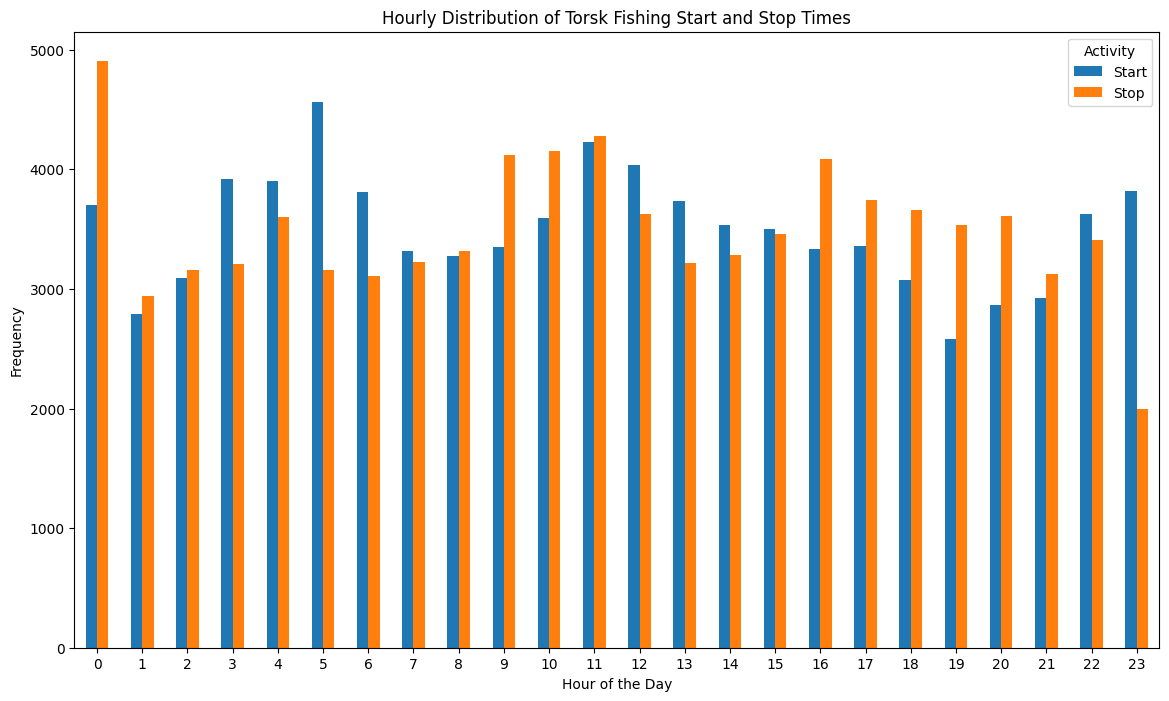

In [27]:
# Assuming 'torsk_as_main' DataFrame is already loaded and includes 'Startklokkeslett' and 'Stoppklokkeslett'

# Convert columns to datetime format to easily extract the hour
torsk_as_Bycatch['Startklokkeslett'] = pd.to_datetime(torsk_as_Bycatch['Startklokkeslett'], format='%H:%M')
torsk_as_Bycatch['Stoppklokkeslett'] = pd.to_datetime(torsk_as_Bycatch['Stoppklokkeslett'], format='%H:%M')

# Extract the hour from the datetime for both start and stop times
torsk_as_Bycatch['StartHour'] = torsk_as_Bycatch['Startklokkeslett'].dt.hour
torsk_as_Bycatch['StopHour'] = torsk_as_Bycatch['Stoppklokkeslett'].dt.hour

# Calculate hourly distributions for both
hourly_distribution_start = torsk_as_Bycatch['StartHour'].value_counts().sort_index()
hourly_distribution_stop = torsk_as_Bycatch['StopHour'].value_counts().sort_index()

# Prepare DataFrame for plotting
df_plot = pd.DataFrame({'Start': hourly_distribution_start, 'Stop': hourly_distribution_stop}).fillna(0)

# Plotting the grouped bar chart
df_plot.plot(kind='bar', figsize=(14, 8))
plt.title('Hourly Distribution of Torsk Fishing Start and Stop Times')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(title='Activity')
plt.show()

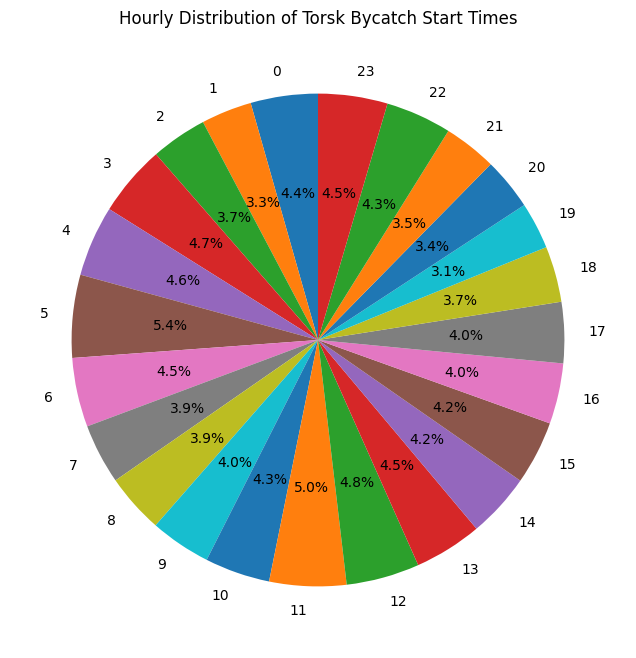

In [28]:
fig, ax = plt.subplots(figsize=(8, 8))  # Adjust size as needed
hourly_distribution_start.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Hourly Distribution of Torsk Bycatch Start Times')
plt.ylabel('')  # Removing the y-label as it's not needed for pie charts

# Show the plot
plt.show()

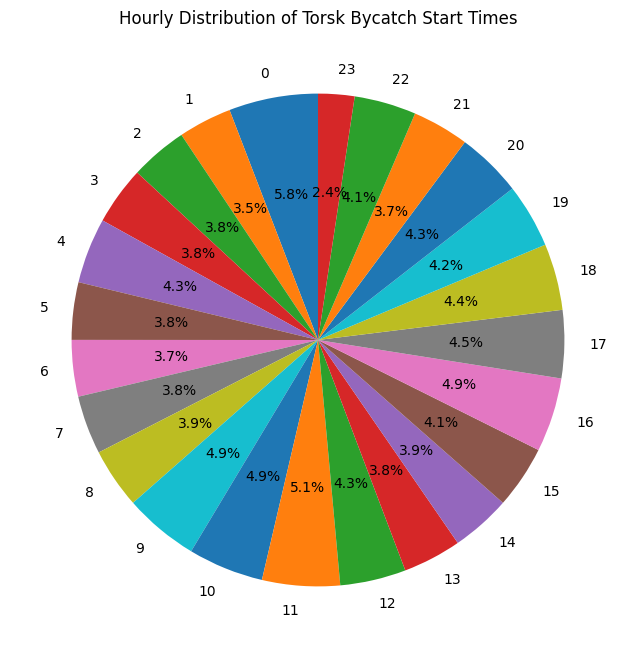

In [30]:
fig, ax = plt.subplots(figsize=(8, 8))  # Adjust size as needed
hourly_distribution_stop.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Hourly Distribution of Torsk Bycatch Start Times')
plt.ylabel('')  # Removing the y-label as it's not needed for pie charts

# Show the plot
plt.show()

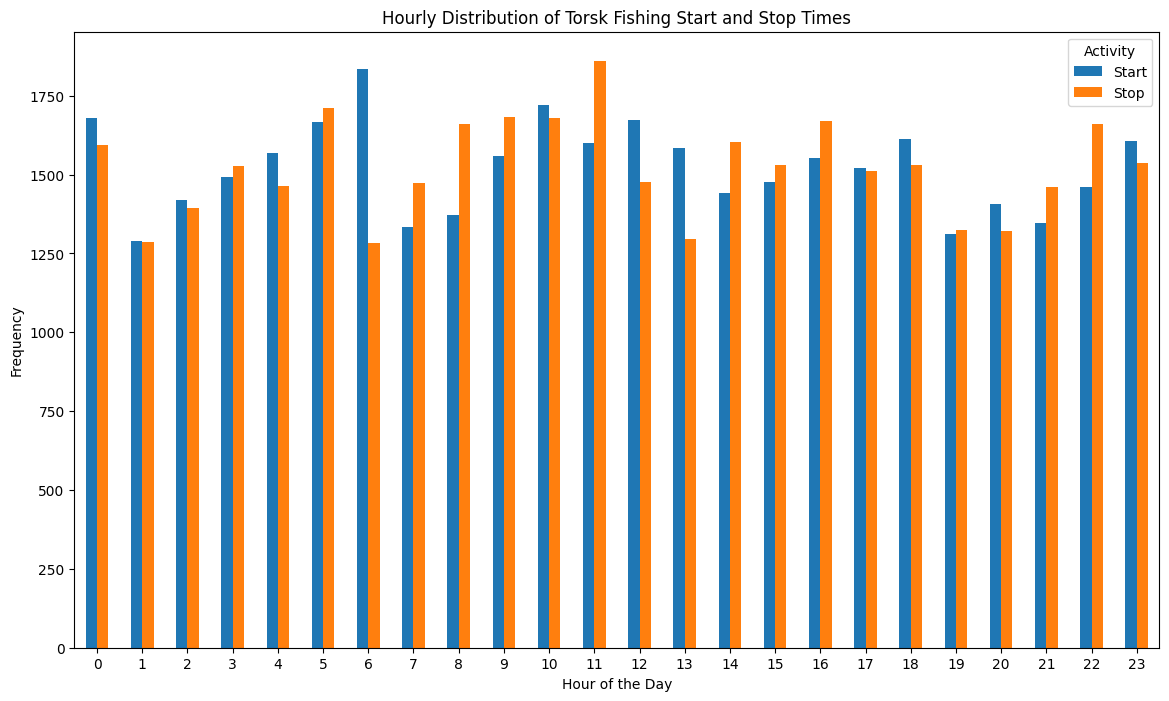

In [29]:
# Assuming 'torsk_as_main' DataFrame is already loaded and includes 'Startklokkeslett' and 'Stoppklokkeslett'

# Convert columns to datetime format to easily extract the hour
torsk_as_main['Startklokkeslett'] = pd.to_datetime(torsk_as_main['Startklokkeslett'], format='%H:%M')
torsk_as_main['Stoppklokkeslett'] = pd.to_datetime(torsk_as_main['Stoppklokkeslett'], format='%H:%M')

# Extract the hour from the datetime for both start and stop times
torsk_as_main['StartHour'] = torsk_as_main['Startklokkeslett'].dt.hour
torsk_as_main['StopHour'] = torsk_as_main['Stoppklokkeslett'].dt.hour

# Calculate hourly distributions for both
hourly_distribution_start2 = torsk_as_main['StartHour'].value_counts().sort_index()
hourly_distribution_stop2 = torsk_as_main['StopHour'].value_counts().sort_index()

# Prepare DataFrame for plotting
df_plot2 = pd.DataFrame({'Start': hourly_distribution_start2, 'Stop': hourly_distribution_stop2}).fillna(0)

# Plotting the grouped bar chart
df_plot2.plot(kind='bar', figsize=(14, 8))
plt.title('Hourly Distribution of Torsk Fishing Start and Stop Times')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(title='Activity')
plt.show()

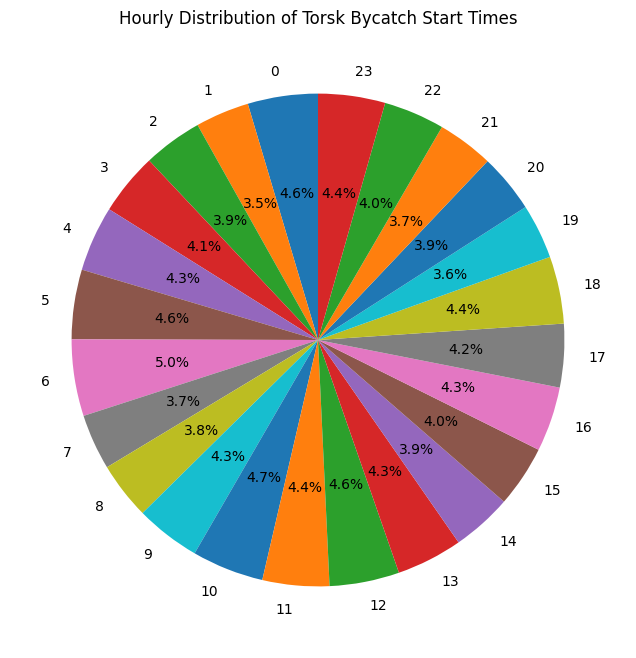

In [31]:
fig, ax = plt.subplots(figsize=(8, 8))  # Adjust size as needed
hourly_distribution_start2.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Hourly Distribution of Torsk Bycatch Start Times')
plt.ylabel('')  # Removing the y-label as it's not needed for pie charts

# Show the plot
plt.show()

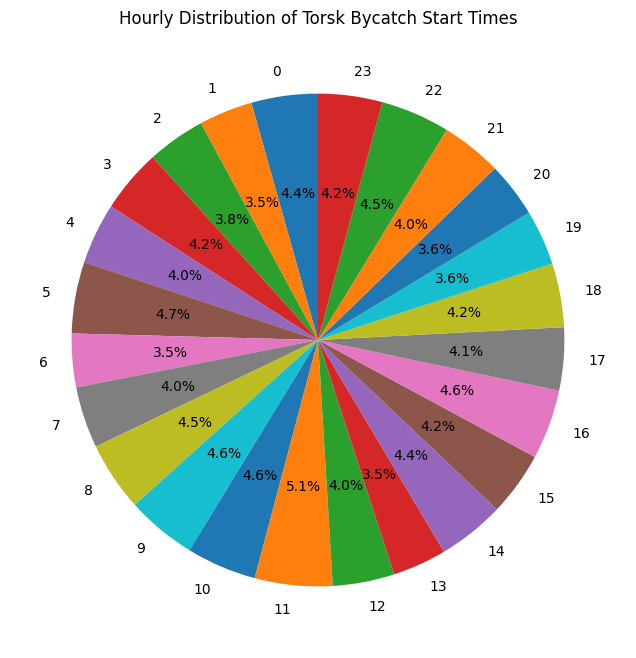

In [32]:
fig, ax = plt.subplots(figsize=(8, 8))  # Adjust size as needed
hourly_distribution_stop2.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Hourly Distribution of Torsk Bycatch Start Times')
plt.ylabel('')  # Removing the y-label as it's not needed for pie charts

# Show the plot
plt.show()

Doesnt look like there are any special hours where they get more Bycatches